# 11. 스택의 응용 - 후위 표기 수식 계산

---

후위표현식을 왼쪽부터 읽으면서 연산자를 이용해 계산해보자!

> - **피연산자이면 스택에 push**
> - 연산자를 만나면 스택에서 피연산자를 pop 해 연산자를 적용 후 스택에 push
> - 수식의 끝에 도달하면 남은 원소를 pop > 이게 계산 결과가 된다

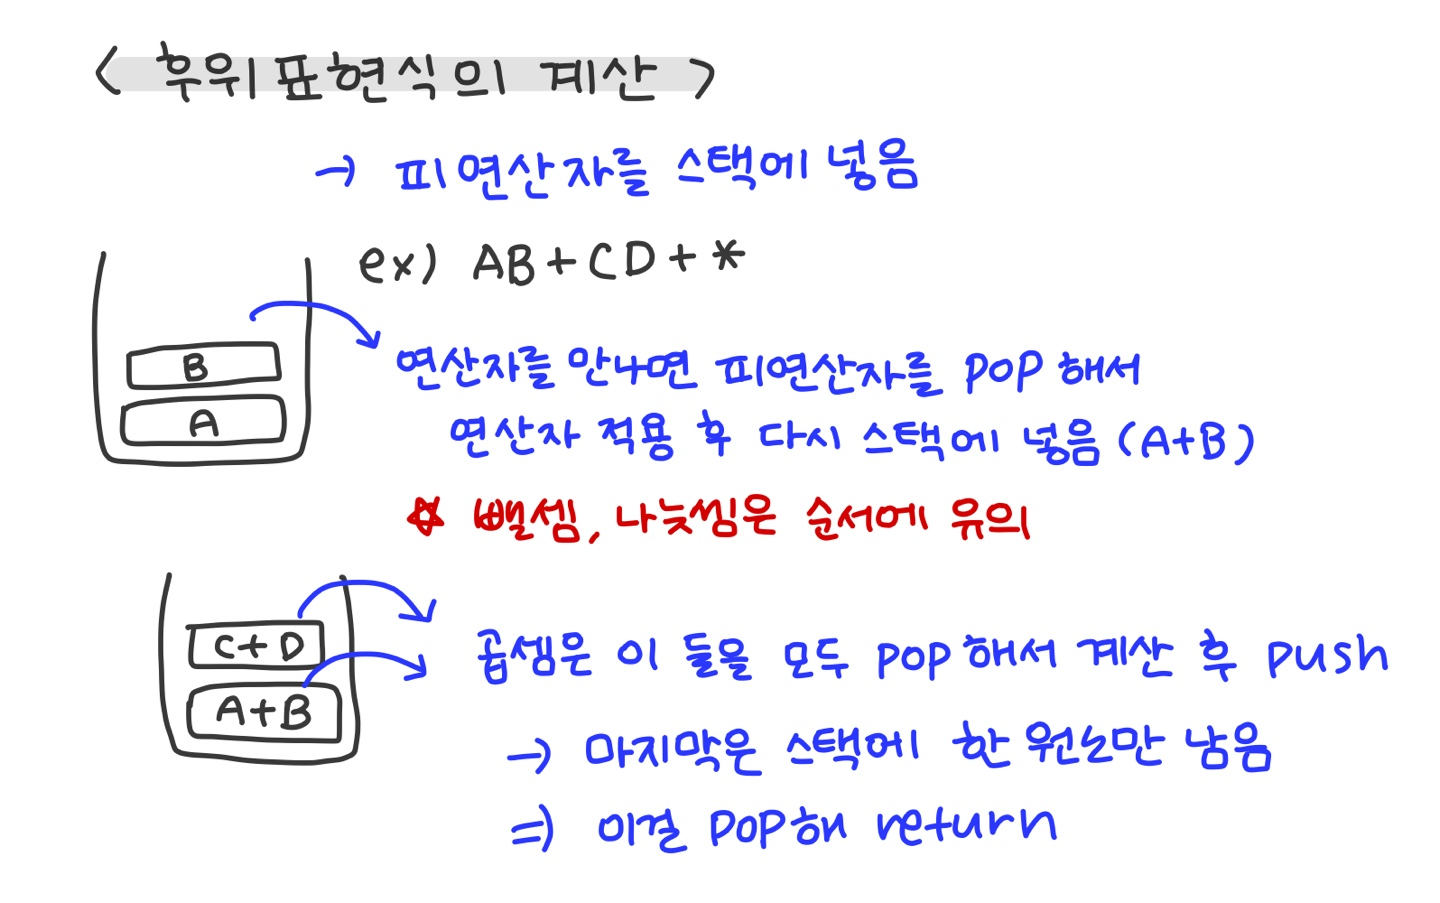

In [5]:
# 스택의 array class 정의
class ArrayStack:

    def __init__(self):
        self.data = []

    def size(self):
        return len(self.data)

    def isEmpty(self):
        return self.size() == 0

    def push(self, item):
        self.data.append(item)

    def pop(self):
        return self.data.pop()

    def peek(self):
        return self.data[-1]


In [10]:
# 실제 숫자로 이루어진 수식에 적용!
# 몇자리인지 모르기 때문에 각각을 피연산자/연산자를 분리해 리스트로 만들기!

def splitTokens(exprStr):
    tokens=[]
    val=0
    valProcessing=False
    
    for c in exprStr:
        if c=='':
            continue   #  그냥 넘어감
        
        # 숫자일 때
        if c in '0123456789':
            val = val*10 + int(c)
            valProcessing = True
        
        # 연산자일 때
        else:                  
            if valProcessing:
                tokens.append(val)
                val=0 
                
            valProcessing = False   # 십진수를 처리하고있지 않았음을 나타냄
            tokens.append(c)
            
    if valProcessing:
        tokens.append(val)
        
    return tokens

In [11]:
splitTokens('1214+1002*2')   # 이렇게 연산자와 피연산자가 구분되어 담긴다

[1214, '+', 1002, '*', 2]

------
### Process
1. 중위 표현식 > 후위표현식으로 변환
2. 후위표현식을 계산하는 함수 정의

In [32]:
# 인자로 앞 함수의 리스트가 주어짐

class ArrayStack:

    def __init__(self):
        self.data = []

    def size(self):
        return len(self.data)

    def isEmpty(self):
        return self.size() == 0

    def push(self, item):
        self.data.append(item)

    def pop(self):
        return self.data.pop()

    def peek(self):
        return self.data[-1]


# 1. 중위표현식을 후위표현식으로 바꾸는 함수
def infixToPostfix(tokenList):
    prec={
        '*':3, '/':3, '+':2, '-':2, '(':1
    }
    
    openStack = ArrayStack()
    postfixList = []   # 리스트로 만들어서 함수를 리턴
    
    for token in tokenList:
        
        # 1. 피연산자일 때
        if type(token) is int:
            postfixList.append(token)
         
        # 2. 열린 괄호 일 때
        elif token == '(':
            openStack.push(token)
        
        # 3. 닫힌 괄호 일 때
        elif token == ')':
            while not openStack.peek() == '(':
                postfixList.append(openStack.pop())
            openStack.pop()
            
        # 4. 연산자일 때
        else:
            while not openStack.isEmpty():   
                if prec[openStack.peek()]<prec[token]:  
                    break
                postfixList.append(openStack.pop())
                
            openStack.push(token)
        
    while not openStack.isEmpty():
        postfixList.append(openStack.pop())
        
    return postfixList

In [33]:
infixToPostfix([1214, '+', 1002, '*', 2])   # 순서가 바뀌어서 출력되는 모습

[1214, 1002, 2, '*', '+']

In [34]:
# 2. 후위표현식을 연산하는 함수(피연산자를 스택해야함을 유의!!)

def postfixEval(tokenList):
    valStack = ArrayStack()
    
    for token in tokenList:
        
        # 피연산자일 때(정수형 타입)
        if type(token) is int:
            valStack.push(token)
        
        # 연산자를 만났을 때(문자열 타입)
        elif token == '*':
            a = valStack.pop()
            b = valStack.pop()
            valStack.push(a*b)
        
        elif token == '/':
            a = valStack.pop()
            b = valStack.pop()
            valStack.push(b-a)
        
        elif token == '+':
            a = valStack.pop()
            b = valStack.pop()
            valStack.push(a+b)
        
        elif token == '-':
            a = valStack.pop()
            b = valStack.pop()
            valStack.push(b/a)
        
    return valStack.pop()


# 3. 후위표현식을 연산하는 함수 어셈블
def solution(expr):
    tokens = splitTokens(expr)
    postfix = infixToPostfix(tokens)
    val = postfixEval(postfix)
    return val